[*********************100%%**********************]  5 of 5 completed


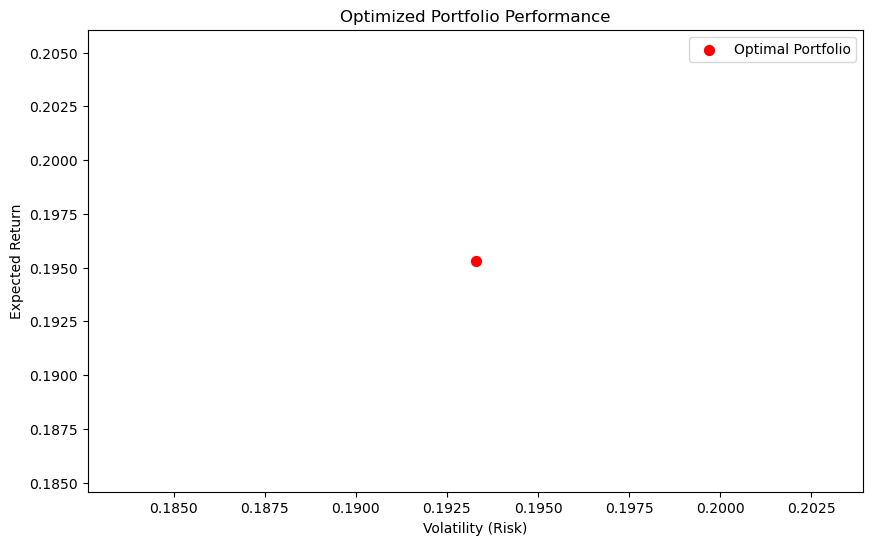

Optimal weights: [3.24615504e-01 9.36750677e-17 4.57525449e-01 0.00000000e+00
 2.17859047e-01]
Expected annual return: 0.20%
Expected risk (volatility): 0.19%


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from scipy.optimize import minimize

# Initial Setup
investment_amount = 100000  # Predetermined investment amount
assets = ['AAPL', 'GOOGL', 'MSFT', 'BND', 'GLD']  # Example assets including stocks and ETFs

# Fetch historical data
data = yf.download(assets, start='2020-01-01', end='2023-12-31')['Adj Close']

# Data preprocessing
returns = data.pct_change().dropna()
mean_returns = returns.mean()
cov_matrix = returns.cov()

# Portfolio Performance Function
def portfolio_performance(weights, mean_returns, cov_matrix):
    returns = np.dot(weights, mean_returns) * 252
    risk = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights))) * np.sqrt(252)
    return risk, returns

# Objective Function to Maximize Returns
def negative_sharpe_ratio(weights, mean_returns, cov_matrix, risk_free_rate=0.01):
    risk, returns = portfolio_performance(weights, mean_returns, cov_matrix)
    sharpe_ratio = (returns - risk_free_rate) / risk
    return -sharpe_ratio  # Minimizing negative Sharpe ratio

# Constraints
constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})  # Sum of weights is 1
bounds = tuple((0, 1) for asset in range(len(assets)))

# Optimization
num_assets = len(assets)
initial_guess = num_assets * [1. / num_assets]
optimized_result = minimize(negative_sharpe_ratio, initial_guess, args=(mean_returns, cov_matrix),
                            method='SLSQP', bounds=bounds, constraints=constraints)

# Extract the optimal weights
optimal_weights = optimized_result.x

# Visualization
fig, ax = plt.subplots(figsize=(10, 6))
risk, return_ = portfolio_performance(optimal_weights, mean_returns, cov_matrix)
ax.scatter(risk, return_, color='red', s=50, label='Optimal Portfolio')
ax.legend()
plt.title('Optimized Portfolio Performance')
plt.xlabel('Volatility (Risk)')
plt.ylabel('Expected Return')
plt.show()

# Summary
print(f"Optimal weights: {optimal_weights}")
print(f"Expected annual return: {return_:.2f}%")
print(f"Expected risk (volatility): {risk:.2f}%")